# Atypical country

In [2]:
dataset_meta = DatasetMeta(SchemaName.NETFLIX, NetflixDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA (adults only),4,TV Dramas,In a future where the elite inhabit an island ...
2,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA (adults only),93,International Movies,After a devastating earthquake hits Mexico Cit...
3,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R (adults only),78,International Movies,"When an army recruit is found dead, his fellow..."
4,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13 (13+ children),80,Independent Movies,"In a postapocalyptic world, rag-doll robots hi..."
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13 (13+ children),123,Dramas,A brilliant group of students become card-coun...


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('show_id'),
                aggregation_function=AggregationFunction.COUNT),
    FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.EQUAL,
             filter_term='India'),
    BackAction(),
    FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.NOTEQUAL,
         filter_term='India'),
    BackAction(),
    BackAction(),
    GroupAction(grouped_column=Column('type'), aggregated_column=Column('show_id'),
        aggregation_function=AggregationFunction.COUNT),
    FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.EQUAL,
             filter_term='India'),
    BackAction(),
    FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.NOTEQUAL,
         filter_term='India')
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

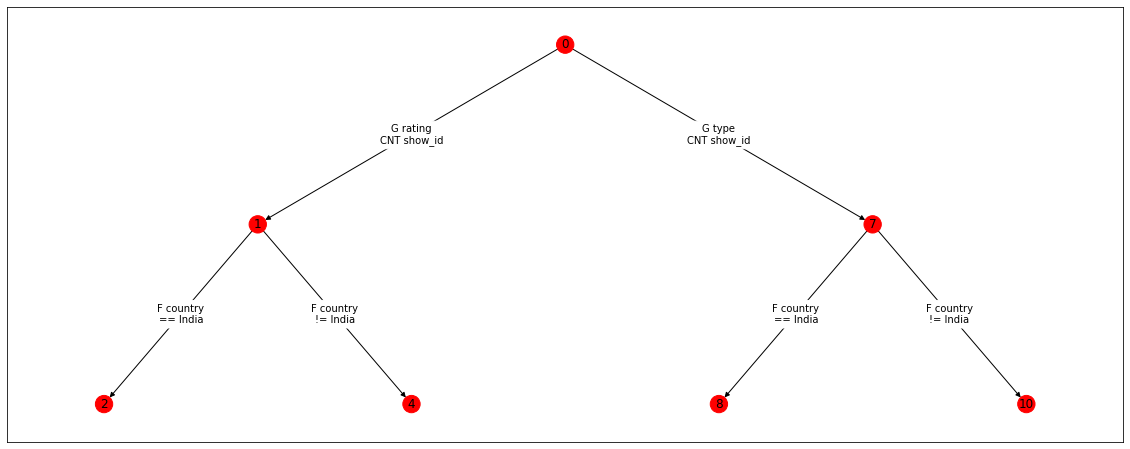

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by rating CNT(show_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,show_id
rating,
TV-MA (adults only),2863
TV-14 (14+ children),1931
TV-PG (older children),806
R (adults only),665
PG-13 (13+ children),386
TV-Y (all children),280
TV-Y7 (7+ children),271
PG (older children),247
TV-G (all ages),194


### Query 2: <span style="color:DimGray">Group by rating CNT(show_id) AND</span> <span style="color:blue;">Filter country == India</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

,show_id
rating,
TV-14 (14+ children),533
TV-MA (adults only),240
TV-PG (older children),138
TV-Y7 (7+ children),13
TV-G (all ages),9
TV-Y (all children),6
NR (not rated),5
PG (older children),4
PG-13 (13+ children),4


### Query 4: <span style="color:DimGray">Group by rating CNT(show_id) AND</span> <span style="color:blue;">Filter country != India</span>

In [7]:
display(prepare_display(action_execution_result_lst, 3))

,show_id
rating,
TV-MA (adults only),2623
TV-14 (14+ children),1398
TV-PG (older children),668
R (adults only),663
PG-13 (13+ children),382
TV-Y (all children),274
TV-Y7 (7+ children),258
PG (older children),243
TV-G (all ages),185


### Query 7: <span style="color:blue;">Group by type CNT(show_id)</span>

In [8]:
display(prepare_display(action_execution_result_lst, 6))

,show_id
type,
Movie,5377
TV Show,2410


### Query 8: <span style="color:DimGray">Group by type CNT(show_id) AND</span> <span style="color:blue;">Filter country == India</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,show_id
type,
Movie,883
TV Show,73


### Query 10: <span style="color:DimGray">Group by type CNT(show_id) AND</span> <span style="color:blue;">Filter country != India</span>

In [10]:
display(prepare_display(action_execution_result_lst, 9))

,show_id
type,
Movie,4494
TV Show,2337
